# Градиентный спуск

In [1]:
import numpy as np

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

## Реализация метода

In [2]:
def get_partial_derivative(f, x, y):
    '''
    Принимает на вход функцию двух переменных и возвращает
    частные производные в точке (x, y)
    '''
    dx = 0.0001 
    dfx = (f(x + dx, y) - f(x - dx, y)) / (2.0 * dx)
    dfy = (f(x, y + dx) - f(x, y - dx)) / (2.0 * dx) 
    return (dfx, dfy)

In [3]:
def gradient_descent(f, x, y, alpha=0.001, epsilon=0.001):
    '''
    Находит минимум функции двух переменных методом
    градиентого спуска с фиксированным шагом. Параметры:
    f - исходная функция
    x, y - начальное приближение
    alpha - множитель шага
    epsilon - константа критерия останова
    '''
    x_log = [x]
    y_log = [y]
    
    while True:   
        old_x, old_y = x, y
       
        dfx, dfy = get_partial_derivative(f, x, y)
                
        x = x - alpha * dfx
        y = y - alpha * dfy
        
        x_log.append(x)
        y_log.append(y)
        
        if f(old_x, old_y) - f(x, y) <= epsilon:
            break
        
    return (x, y, x_log, y_log)

## Тестирование и визуализация работы

Тестируем на следующей функции:

$$ f(x, y) = x^3 + 8y^3 - 6xy + 5$$

Минимум этой функции находится в точке x = 1, y = 0.5 (найдены аналитически).

In [4]:
def f(x, y):
    return (x ** 3) + 8 * (y ** 3) - (6 * x * y) + 5

Запускаем градиентный спуск запустим со следующими параметрами:

In [5]:
start_x = 15
start_y = 20

In [6]:
x, y, x_log, y_log = gradient_descent(f, start_x, start_y, alpha=0.001, epsilon=0.001)

Результат работы:

In [7]:
print(x, y)

1.19756681463016 0.5572207260634965


Визуализируем результат работы:

In [8]:
z_log = [f(x_log[i], y_log[i]) for i in range(len(x_log))]

In [9]:
X, Y = np.meshgrid(np.arange(-20, 25), np.arange(-20, 25))
Z = np.array([f(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

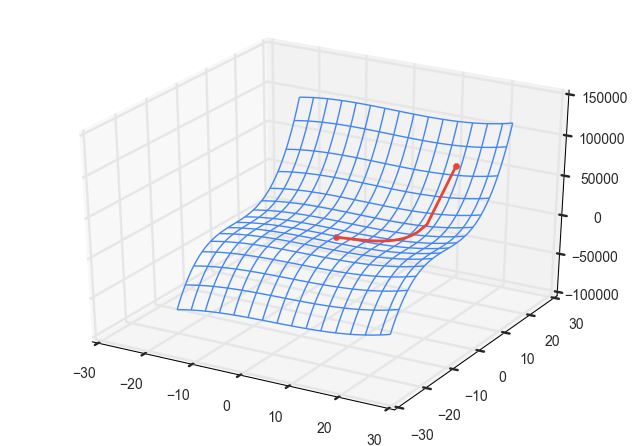

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, color="#4285f4", linewidth=1)
ax.plot(x_log, y_log, z_log, color='#ea4335', linewidth = 2)

ax.scatter(start_x, start_y, f(start_x, start_y), color='#ea4335')
ax.scatter(x, y, f(x, y), color='#ea4335')

plt.show()